In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import sys

from data_utils import get_cifar10_loaders
from model_utils import resnet56, resnet20

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
batch_size = 128
num_workers = 2

train_loader, test_loader = get_cifar10_loaders(batch_size, num_workers)
teacher = resnet56(num_classes=10).to(device)
student_og = resnet20(num_classes=10).to(device)

In [3]:
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from tqdm import tqdm

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    teacher.parameters(),
    lr=0.1,
    momentum=0.9,
    weight_decay=1e-4
)
scheduler = MultiStepLR(optimizer, milestones=[100, 150], gamma=0.1)


In [6]:
num_epochs = 200
best_acc = 0.0

for epoch in range(num_epochs):
    teacher.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=False)
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = teacher(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        train_correct += preds.eq(labels).sum().item()
        train_total += labels.size(0)

        loop.set_postfix(loss=running_loss / train_total, acc=100.*train_correct/train_total)

    scheduler.step()

    # ========== Validation ==========
    teacher.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = teacher(images)
            _, preds = outputs.max(1)
            test_correct += preds.eq(labels).sum().item()
            test_total += labels.size(0)

    test_acc = 100. * test_correct / test_total
    print(f"Epoch {epoch+1}: Train Acc: {100.*train_correct/train_total:.2f}% | Test Acc: {test_acc:.2f}%")

    # ========== Save Best Model ==========
    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(teacher.state_dict(), "Checkpoints/resnet56_teacher_best.pth")

print(f"Best Test Accuracy: {best_acc:.2f}%")


Epoch 1: Train Acc: 36.84% | Test Acc: 40.81%


Epoch 2: Train Acc: 48.41% | Test Acc: 49.88%


Epoch 3: Train Acc: 59.06% | Test Acc: 52.62%


Epoch 4: Train Acc: 67.61% | Test Acc: 70.82%


Epoch 5: Train Acc: 73.59% | Test Acc: 70.58%


Epoch 6: Train Acc: 77.23% | Test Acc: 74.53%


Epoch 7: Train Acc: 79.36% | Test Acc: 76.89%


Epoch 8: Train Acc: 81.20% | Test Acc: 79.27%


Epoch 9: Train Acc: 82.52% | Test Acc: 77.55%


Epoch 10: Train Acc: 83.47% | Test Acc: 78.89%


Epoch 11: Train Acc: 84.30% | Test Acc: 78.35%


Epoch 12: Train Acc: 85.16% | Test Acc: 78.99%


Epoch 13: Train Acc: 85.74% | Test Acc: 79.86%


Epoch 14: Train Acc: 86.41% | Test Acc: 84.94%


Epoch 15: Train Acc: 86.67% | Test Acc: 83.90%


Epoch 16: Train Acc: 87.51% | Test Acc: 81.71%


Epoch 17: Train Acc: 87.71% | Test Acc: 82.71%


Epoch 18: Train Acc: 88.16% | Test Acc: 83.87%


Epoch 19: Train Acc: 88.36% | Test Acc: 85.42%


Epoch 20: Train Acc: 89.04% | Test Acc: 85.46%


Epoch 21: Train Acc: 89.26% | Test Acc: 85.21%


Epoch 22: Train Acc: 89.64% | Test Acc: 86.40%


Epoch 23: Train Acc: 89.52% | Test Acc: 86.07%


Epoch 24: Train Acc: 89.75% | Test Acc: 84.29%


Epoch 25: Train Acc: 90.04% | Test Acc: 85.95%


Epoch 26: Train Acc: 90.36% | Test Acc: 86.54%


Epoch 27: Train Acc: 90.63% | Test Acc: 85.18%


Epoch 28: Train Acc: 90.81% | Test Acc: 84.62%


Epoch 29: Train Acc: 90.60% | Test Acc: 85.79%


Epoch 30: Train Acc: 91.05% | Test Acc: 86.63%


Epoch 31: Train Acc: 91.21% | Test Acc: 87.38%


Epoch 32: Train Acc: 91.17% | Test Acc: 86.25%


Epoch 33: Train Acc: 91.56% | Test Acc: 85.16%


Epoch 34: Train Acc: 91.73% | Test Acc: 87.31%


Epoch 35: Train Acc: 91.79% | Test Acc: 85.76%


Epoch 36: Train Acc: 91.87% | Test Acc: 86.60%


Epoch 37: Train Acc: 91.86% | Test Acc: 87.15%


Epoch 38: Train Acc: 92.15% | Test Acc: 87.13%


Epoch 39: Train Acc: 92.11% | Test Acc: 86.93%


Epoch 40: Train Acc: 92.16% | Test Acc: 84.71%


Epoch 41: Train Acc: 92.35% | Test Acc: 87.33%


Epoch 42: Train Acc: 92.57% | Test Acc: 87.22%


Epoch 43: Train Acc: 92.49% | Test Acc: 87.25%


Epoch 44: Train Acc: 92.45% | Test Acc: 87.25%


Epoch 45: Train Acc: 92.70% | Test Acc: 86.57%


Epoch 46: Train Acc: 92.67% | Test Acc: 83.89%


Epoch 47: Train Acc: 92.78% | Test Acc: 88.21%


Epoch 48: Train Acc: 92.98% | Test Acc: 85.40%


Epoch 49: Train Acc: 92.78% | Test Acc: 87.81%


Epoch 50: Train Acc: 93.11% | Test Acc: 85.52%


Epoch 51: Train Acc: 93.20% | Test Acc: 87.49%


Epoch 52: Train Acc: 93.31% | Test Acc: 88.72%


Epoch 53: Train Acc: 93.41% | Test Acc: 87.44%


Epoch 54: Train Acc: 93.30% | Test Acc: 87.05%


Epoch 55: Train Acc: 93.06% | Test Acc: 87.23%


Epoch 56: Train Acc: 93.19% | Test Acc: 85.67%


Epoch 57: Train Acc: 93.30% | Test Acc: 87.98%


Epoch 58: Train Acc: 93.55% | Test Acc: 87.02%


Epoch 59: Train Acc: 93.42% | Test Acc: 88.18%


Epoch 60: Train Acc: 93.34% | Test Acc: 88.23%


Epoch 61: Train Acc: 93.56% | Test Acc: 88.88%


Epoch 62: Train Acc: 93.54% | Test Acc: 85.33%


Epoch 63: Train Acc: 93.55% | Test Acc: 87.25%


Epoch 64: Train Acc: 93.68% | Test Acc: 84.05%


Epoch 65: Train Acc: 93.59% | Test Acc: 87.55%


Epoch 66: Train Acc: 93.68% | Test Acc: 89.53%


Epoch 67: Train Acc: 93.66% | Test Acc: 88.00%


Epoch 68: Train Acc: 93.68% | Test Acc: 87.64%


Epoch 69: Train Acc: 93.71% | Test Acc: 88.22%


Epoch 70: Train Acc: 93.80% | Test Acc: 86.30%


Epoch 71: Train Acc: 93.97% | Test Acc: 86.83%


Epoch 72: Train Acc: 93.70% | Test Acc: 88.08%


Epoch 73: Train Acc: 93.83% | Test Acc: 88.46%


Epoch 74: Train Acc: 93.94% | Test Acc: 88.00%


Epoch 75: Train Acc: 93.94% | Test Acc: 87.46%


Epoch 76: Train Acc: 94.04% | Test Acc: 88.48%


Epoch 77: Train Acc: 93.97% | Test Acc: 85.58%


Epoch 78: Train Acc: 94.02% | Test Acc: 88.62%


Epoch 79: Train Acc: 94.07% | Test Acc: 87.99%


Epoch 80: Train Acc: 94.21% | Test Acc: 85.59%


Epoch 81: Train Acc: 94.05% | Test Acc: 85.36%


Epoch 82: Train Acc: 94.30% | Test Acc: 88.91%


Epoch 83: Train Acc: 94.23% | Test Acc: 87.32%


Epoch 84: Train Acc: 94.11% | Test Acc: 85.36%


Epoch 85: Train Acc: 94.15% | Test Acc: 87.27%


Epoch 86: Train Acc: 94.20% | Test Acc: 87.15%


Epoch 87: Train Acc: 94.38% | Test Acc: 86.44%


Epoch 88: Train Acc: 94.39% | Test Acc: 88.68%


Epoch 89: Train Acc: 94.26% | Test Acc: 88.58%


Epoch 90: Train Acc: 94.23% | Test Acc: 87.96%


Epoch 91: Train Acc: 94.36% | Test Acc: 88.69%


Epoch 92: Train Acc: 94.35% | Test Acc: 86.73%


Epoch 93: Train Acc: 94.45% | Test Acc: 88.69%


Epoch 94: Train Acc: 94.26% | Test Acc: 87.51%


Epoch 95: Train Acc: 94.42% | Test Acc: 88.10%


Epoch 96: Train Acc: 94.43% | Test Acc: 87.10%


Epoch 97: Train Acc: 94.48% | Test Acc: 87.82%


Epoch 98: Train Acc: 94.43% | Test Acc: 88.07%


Epoch 99: Train Acc: 94.78% | Test Acc: 87.27%


Epoch 100: Train Acc: 97.28% | Test Acc: 92.15%


Epoch 101: Train Acc: 98.31% | Test Acc: 92.61%


Epoch 102: Train Acc: 98.67% | Test Acc: 92.90%


Epoch 103: Train Acc: 98.85% | Test Acc: 92.72%


Epoch 104: Train Acc: 99.02% | Test Acc: 92.93%


Epoch 105: Train Acc: 99.07% | Test Acc: 92.76%


Epoch 106: Train Acc: 99.16% | Test Acc: 92.75%


Epoch 107: Train Acc: 99.27% | Test Acc: 92.87%


Epoch 108: Train Acc: 99.30% | Test Acc: 92.81%


Epoch 109: Train Acc: 99.39% | Test Acc: 92.85%


Epoch 110: Train Acc: 99.47% | Test Acc: 92.92%


Epoch 111: Train Acc: 99.44% | Test Acc: 92.77%


Epoch 112: Train Acc: 99.53% | Test Acc: 92.90%


Epoch 113: Train Acc: 99.51% | Test Acc: 92.99%


Epoch 114: Train Acc: 99.58% | Test Acc: 93.00%


Epoch 115: Train Acc: 99.59% | Test Acc: 93.00%


Epoch 116: Train Acc: 99.62% | Test Acc: 92.65%


Epoch 117: Train Acc: 99.64% | Test Acc: 92.92%


Epoch 118: Train Acc: 99.65% | Test Acc: 92.70%


Epoch 119: Train Acc: 99.70% | Test Acc: 92.90%


Epoch 120: Train Acc: 99.66% | Test Acc: 92.83%


Epoch 121: Train Acc: 99.70% | Test Acc: 92.99%


Epoch 122: Train Acc: 99.70% | Test Acc: 93.12%


Epoch 123: Train Acc: 99.73% | Test Acc: 93.13%


Epoch 124: Train Acc: 99.77% | Test Acc: 93.11%


Epoch 125: Train Acc: 99.77% | Test Acc: 92.98%


Epoch 126: Train Acc: 99.75% | Test Acc: 92.91%


Epoch 127: Train Acc: 99.77% | Test Acc: 92.98%


Epoch 128: Train Acc: 99.77% | Test Acc: 93.08%


Epoch 129: Train Acc: 99.82% | Test Acc: 92.90%


Epoch 130: Train Acc: 99.79% | Test Acc: 93.09%


Epoch 131: Train Acc: 99.79% | Test Acc: 92.91%


Epoch 132: Train Acc: 99.81% | Test Acc: 92.98%


Epoch 133: Train Acc: 99.84% | Test Acc: 93.07%


Epoch 134: Train Acc: 99.83% | Test Acc: 93.04%


Epoch 135: Train Acc: 99.82% | Test Acc: 93.14%


Epoch 136: Train Acc: 99.87% | Test Acc: 93.05%


Epoch 137: Train Acc: 99.85% | Test Acc: 92.91%


Epoch 138: Train Acc: 99.87% | Test Acc: 93.00%


Epoch 139: Train Acc: 99.85% | Test Acc: 93.17%


Epoch 140: Train Acc: 99.86% | Test Acc: 92.91%


Epoch 141: Train Acc: 99.88% | Test Acc: 92.92%


KeyboardInterrupt: 

In [29]:
student = resnet20(num_classes=10).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    student.parameters(),
    lr=0.1,
    momentum=0.9,
    weight_decay=1e-4
)

scheduler = MultiStepLR(
    optimizer,
    milestones=[50, 75],  # Adjusted for shorter training
    gamma=0.1
)

# Cell 4: Training Loop (Modified - Save Only At End)
num_epochs = 100
best_acc = 0.0
best_epoch = 0

# Create checkpoint directory
os.makedirs('Checkpoints', exist_ok=True)

print("Starting ResNet-20 training...")
print("="*60)

for epoch in range(num_epochs):
    # ========== Training ==========
    student.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=False)
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = student(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        train_correct += preds.eq(labels).sum().item()
        train_total += labels.size(0)

        # Update progress bar
        loop.set_postfix(
            loss=running_loss / train_total, 
            acc=100.*train_correct/train_total
        )

    scheduler.step()

    # ========== Validation ==========
    student.eval()
    test_correct = 0
    test_total = 0
    test_loss = 0.0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = student(images)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item() * images.size(0)
            _, preds = outputs.max(1)
            test_correct += preds.eq(labels).sum().item()
            test_total += labels.size(0)

    # Calculate accuracies
    train_acc = 100. * train_correct / train_total
    test_acc = 100. * test_correct / test_total
    avg_test_loss = test_loss / test_total
    
    print(f"Epoch {epoch+1:3d}: Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}% | Test Loss: {avg_test_loss:.4f}")

    # ========== Track Best (Don't Save Yet) ==========
    if test_acc > best_acc:
        best_acc = test_acc
        best_epoch = epoch + 1
        print(f"  ✓ New best accuracy: {best_acc:.2f}%")

    # Early stopping if accuracy is very high
    if test_acc > 92.0:
        print(f"Reached high accuracy ({test_acc:.2f}%), stopping early.")
        break

print("="*60)
print(f"Training completed!")
print(f"Best Test Accuracy: {best_acc:.2f}% (Epoch {best_epoch})")

# ========== Save Final Model (Only Once) ==========
print("Saving final model...")
torch.save(student.state_dict(), "Checkpoints/resnet20_student_baseline.pth")
print("✓ Model saved to: Checkpoints/resnet20_student_baseline.pth")

Starting ResNet-20 training...


Epoch [1/100]:   0%|          | 1/391 [00:00<00:47,  8.22it/s, acc=11.3, loss=2.34]

Epoch   1: Train Acc: 37.05% | Test Acc: 43.16% | Test Loss: 1.5712
  ✓ New best accuracy: 43.16%


Epoch   2: Train Acc: 57.43% | Test Acc: 60.86% | Test Loss: 1.1159
  ✓ New best accuracy: 60.86%


Epoch   3: Train Acc: 66.48% | Test Acc: 69.29% | Test Loss: 0.8831
  ✓ New best accuracy: 69.29%


Epoch   4: Train Acc: 71.83% | Test Acc: 71.97% | Test Loss: 0.8669
  ✓ New best accuracy: 71.97%


Epoch   5: Train Acc: 75.61% | Test Acc: 72.34% | Test Loss: 0.8395
  ✓ New best accuracy: 72.34%


Epoch   6: Train Acc: 78.01% | Test Acc: 76.75% | Test Loss: 0.7107
  ✓ New best accuracy: 76.75%


Epoch   7: Train Acc: 79.71% | Test Acc: 79.54% | Test Loss: 0.6023
  ✓ New best accuracy: 79.54%


Epoch   8: Train Acc: 81.17% | Test Acc: 79.78% | Test Loss: 0.6295
  ✓ New best accuracy: 79.78%


Epoch   9: Train Acc: 82.10% | Test Acc: 81.43% | Test Loss: 0.5545
  ✓ New best accuracy: 81.43%


Epoch  10: Train Acc: 83.05% | Test Acc: 77.96% | Test Loss: 0.6916


Epoch  11: Train Acc: 83.71% | Test Acc: 81.29% | Test Loss: 0.5681


Epoch  12: Train Acc: 84.20% | Test Acc: 79.83% | Test Loss: 0.6609


Epoch  13: Train Acc: 84.76% | Test Acc: 81.15% | Test Loss: 0.5615


Epoch  14: Train Acc: 85.05% | Test Acc: 81.99% | Test Loss: 0.5554
  ✓ New best accuracy: 81.99%


Epoch  15: Train Acc: 85.48% | Test Acc: 83.09% | Test Loss: 0.5171
  ✓ New best accuracy: 83.09%


Epoch  16: Train Acc: 86.20% | Test Acc: 81.56% | Test Loss: 0.5482


Epoch  17: Train Acc: 86.33% | Test Acc: 82.49% | Test Loss: 0.5462


Epoch  18: Train Acc: 86.39% | Test Acc: 82.06% | Test Loss: 0.5438


Epoch  19: Train Acc: 86.91% | Test Acc: 81.17% | Test Loss: 0.5851


Epoch  20: Train Acc: 87.06% | Test Acc: 85.18% | Test Loss: 0.4402
  ✓ New best accuracy: 85.18%


Epoch  21: Train Acc: 87.45% | Test Acc: 82.29% | Test Loss: 0.5776


Epoch  22: Train Acc: 87.80% | Test Acc: 84.65% | Test Loss: 0.4621


Epoch  23: Train Acc: 87.80% | Test Acc: 85.57% | Test Loss: 0.4369
  ✓ New best accuracy: 85.57%


Epoch  24: Train Acc: 87.99% | Test Acc: 84.84% | Test Loss: 0.4505


Epoch  25: Train Acc: 88.15% | Test Acc: 85.19% | Test Loss: 0.4496


Epoch  26: Train Acc: 88.33% | Test Acc: 83.65% | Test Loss: 0.5303


Epoch  27: Train Acc: 88.70% | Test Acc: 83.65% | Test Loss: 0.4840


Epoch  28: Train Acc: 88.65% | Test Acc: 82.73% | Test Loss: 0.5458


Epoch  29: Train Acc: 89.00% | Test Acc: 82.99% | Test Loss: 0.5450


Epoch  30: Train Acc: 89.09% | Test Acc: 84.33% | Test Loss: 0.5150


Epoch  31: Train Acc: 89.00% | Test Acc: 84.82% | Test Loss: 0.4557


Epoch  32: Train Acc: 89.49% | Test Acc: 81.52% | Test Loss: 0.6419


Epoch  33: Train Acc: 89.41% | Test Acc: 83.57% | Test Loss: 0.5571


Epoch  34: Train Acc: 89.43% | Test Acc: 83.81% | Test Loss: 0.5494


Epoch  35: Train Acc: 89.46% | Test Acc: 82.25% | Test Loss: 0.5922


Epoch  36: Train Acc: 89.68% | Test Acc: 85.37% | Test Loss: 0.4694


Epoch  37: Train Acc: 89.90% | Test Acc: 86.09% | Test Loss: 0.4253
  ✓ New best accuracy: 86.09%


Epoch  38: Train Acc: 89.85% | Test Acc: 83.03% | Test Loss: 0.5494


Epoch  39: Train Acc: 89.99% | Test Acc: 83.87% | Test Loss: 0.5252


Epoch  40: Train Acc: 90.36% | Test Acc: 85.39% | Test Loss: 0.4555


Epoch  41: Train Acc: 90.25% | Test Acc: 85.43% | Test Loss: 0.4567


Epoch  42: Train Acc: 90.27% | Test Acc: 84.39% | Test Loss: 0.4879


Epoch  43: Train Acc: 90.43% | Test Acc: 85.66% | Test Loss: 0.4593


Epoch  44: Train Acc: 90.47% | Test Acc: 83.82% | Test Loss: 0.5171


Epoch  45: Train Acc: 90.62% | Test Acc: 85.88% | Test Loss: 0.4592


Epoch  46: Train Acc: 90.62% | Test Acc: 81.96% | Test Loss: 0.5973


Epoch  47: Train Acc: 90.70% | Test Acc: 85.28% | Test Loss: 0.4581


Epoch  48: Train Acc: 90.63% | Test Acc: 84.85% | Test Loss: 0.5035


Epoch  49: Train Acc: 90.57% | Test Acc: 85.80% | Test Loss: 0.4524


Epoch  50: Train Acc: 90.89% | Test Acc: 85.02% | Test Loss: 0.5086


Epoch  51: Train Acc: 94.12% | Test Acc: 90.42% | Test Loss: 0.2991
  ✓ New best accuracy: 90.42%


Epoch  52: Train Acc: 95.15% | Test Acc: 90.61% | Test Loss: 0.2955
  ✓ New best accuracy: 90.61%


Epoch  53: Train Acc: 95.53% | Test Acc: 90.61% | Test Loss: 0.2940


Epoch  54: Train Acc: 95.71% | Test Acc: 90.85% | Test Loss: 0.2929
  ✓ New best accuracy: 90.85%


Epoch  55: Train Acc: 96.00% | Test Acc: 90.81% | Test Loss: 0.2958


Epoch  56: Train Acc: 96.12% | Test Acc: 90.87% | Test Loss: 0.2992
  ✓ New best accuracy: 90.87%


Epoch  57: Train Acc: 96.27% | Test Acc: 90.81% | Test Loss: 0.3113


Epoch  58: Train Acc: 96.41% | Test Acc: 90.59% | Test Loss: 0.3098


Epoch  59: Train Acc: 96.44% | Test Acc: 90.86% | Test Loss: 0.3176


Epoch  60: Train Acc: 96.54% | Test Acc: 90.61% | Test Loss: 0.3187


Epoch  61: Train Acc: 96.58% | Test Acc: 90.72% | Test Loss: 0.3070


Epoch  62: Train Acc: 96.77% | Test Acc: 90.96% | Test Loss: 0.3120
  ✓ New best accuracy: 90.96%


Epoch  63: Train Acc: 96.81% | Test Acc: 91.07% | Test Loss: 0.3072
  ✓ New best accuracy: 91.07%


Epoch  64: Train Acc: 96.90% | Test Acc: 90.85% | Test Loss: 0.3175


Epoch  65: Train Acc: 97.02% | Test Acc: 90.69% | Test Loss: 0.3239


Epoch  66: Train Acc: 97.05% | Test Acc: 90.73% | Test Loss: 0.3311


Epoch  67: Train Acc: 97.14% | Test Acc: 90.88% | Test Loss: 0.3249


Epoch  68: Train Acc: 97.11% | Test Acc: 90.88% | Test Loss: 0.3258


Epoch  69: Train Acc: 97.17% | Test Acc: 90.91% | Test Loss: 0.3276


Epoch  70: Train Acc: 97.33% | Test Acc: 90.74% | Test Loss: 0.3341


Epoch  71: Train Acc: 97.34% | Test Acc: 90.65% | Test Loss: 0.3396


Epoch  72: Train Acc: 97.47% | Test Acc: 90.82% | Test Loss: 0.3353


Epoch  73: Train Acc: 97.38% | Test Acc: 90.69% | Test Loss: 0.3346


Epoch  74: Train Acc: 97.55% | Test Acc: 90.75% | Test Loss: 0.3397


Epoch  75: Train Acc: 97.50% | Test Acc: 90.83% | Test Loss: 0.3453


Epoch  76: Train Acc: 97.80% | Test Acc: 90.91% | Test Loss: 0.3329


Epoch  77: Train Acc: 97.98% | Test Acc: 90.97% | Test Loss: 0.3386


Epoch  78: Train Acc: 98.06% | Test Acc: 90.79% | Test Loss: 0.3349


Epoch  79: Train Acc: 98.09% | Test Acc: 90.89% | Test Loss: 0.3359


Epoch  80: Train Acc: 98.08% | Test Acc: 90.83% | Test Loss: 0.3385


Epoch  81: Train Acc: 98.23% | Test Acc: 90.85% | Test Loss: 0.3375


Epoch  82: Train Acc: 98.12% | Test Acc: 90.99% | Test Loss: 0.3374


Epoch  83: Train Acc: 98.15% | Test Acc: 90.95% | Test Loss: 0.3347


Epoch  84: Train Acc: 98.16% | Test Acc: 90.99% | Test Loss: 0.3402


Epoch  85: Train Acc: 98.05% | Test Acc: 91.00% | Test Loss: 0.3359


Epoch  86: Train Acc: 98.13% | Test Acc: 91.07% | Test Loss: 0.3385


Epoch  87: Train Acc: 98.31% | Test Acc: 90.99% | Test Loss: 0.3396


Epoch  88: Train Acc: 98.24% | Test Acc: 90.95% | Test Loss: 0.3377


Epoch  89: Train Acc: 98.25% | Test Acc: 90.92% | Test Loss: 0.3395


Epoch  90: Train Acc: 98.28% | Test Acc: 91.01% | Test Loss: 0.3398


Epoch  91: Train Acc: 98.22% | Test Acc: 91.21% | Test Loss: 0.3396
  ✓ New best accuracy: 91.21%


Epoch  92: Train Acc: 98.24% | Test Acc: 91.00% | Test Loss: 0.3369


Epoch  93: Train Acc: 98.32% | Test Acc: 91.02% | Test Loss: 0.3382


Epoch  94: Train Acc: 98.34% | Test Acc: 91.01% | Test Loss: 0.3434


Epoch  95: Train Acc: 98.32% | Test Acc: 91.11% | Test Loss: 0.3428


Epoch  96: Train Acc: 98.26% | Test Acc: 91.03% | Test Loss: 0.3418


Epoch  97: Train Acc: 98.32% | Test Acc: 91.07% | Test Loss: 0.3435


Epoch  98: Train Acc: 98.31% | Test Acc: 90.98% | Test Loss: 0.3434


Epoch  99: Train Acc: 98.35% | Test Acc: 91.13% | Test Loss: 0.3388


Epoch 100: Train Acc: 98.41% | Test Acc: 90.99% | Test Loss: 0.3444
Training completed!
Best Test Accuracy: 91.21% (Epoch 91)
Saving final model...
✓ Model saved to: Checkpoints/resnet20_student_baseline.pth


In [26]:
# Import the evaluation functions
from evaluate_cifar import (
    evaluate_cifar10, 
    evaluate_cifar10c_full_avg,
)
from model_utils import resnet56
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = resnet56(num_classes=10)
model.load_state_dict(torch.load('/home/adi000001kmr/ECS189G/Checkpoints/resnet56_teacher_best.pth', map_location=device))

print("=== ResNet-56 Teacher Evaluation ===")

clean_loss, clean_acc = evaluate_cifar10(model, device=device)
print(f"Clean CIFAR-10 Accuracy: {clean_acc:.2f}%")

print("\nEvaluating all CIFAR-10-C corruptions...")
c10c_full_avg = evaluate_cifar10c_full_avg(
    model, 
    data_dir='/home/adi000001kmr/ECS189G/data/CIFAR-10-C',  
    num_workers=0, 
    device=device
)
print(f"CIFAR-10-C Average (all 15): {c10c_full_avg:.2f}%")

=== ResNet-56 Teacher Evaluation ===


CIFAR-10 Eval: 100%|██████████| 79/79 [00:01<00:00, 42.37it/s]


Clean CIFAR-10 Accuracy: 93.17%

Evaluating all CIFAR-10-C corruptions...
CIFAR-10-C Average (all 15): 69.02%


In [27]:
# Import the evaluation functions
from evaluate_cifar import (
    evaluate_cifar10, 
    evaluate_cifar10c_full_avg,
)
from model_utils import resnet20
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = resnet20(num_classes=10)
model.load_state_dict(torch.load('/home/adi000001kmr/ECS189G/Checkpoints/resnet20_student_baseline.pth', map_location=device))

print("=== ResNet-56 Teacher Evaluation ===")

clean_loss, clean_acc = evaluate_cifar10(model, device=device)
print(f"Clean CIFAR-10 Accuracy: {clean_acc:.2f}%")

print("\nEvaluating all CIFAR-10-C corruptions...")
c10c_full_avg = evaluate_cifar10c_full_avg(
    model, 
    data_dir='/home/adi000001kmr/ECS189G/data/CIFAR-10-C',  
    num_workers=0, 
    device=device
)
print(f"CIFAR-10-C Average (all 15): {c10c_full_avg:.2f}%")

=== ResNet-56 Teacher Evaluation ===


CIFAR-10 Eval: 100%|██████████| 79/79 [00:01<00:00, 41.29it/s]


Clean CIFAR-10 Accuracy: 90.99%

Evaluating all CIFAR-10-C corruptions...
CIFAR-10-C Average (all 15): 65.47%


True Label: 4 | Predicted: 4


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


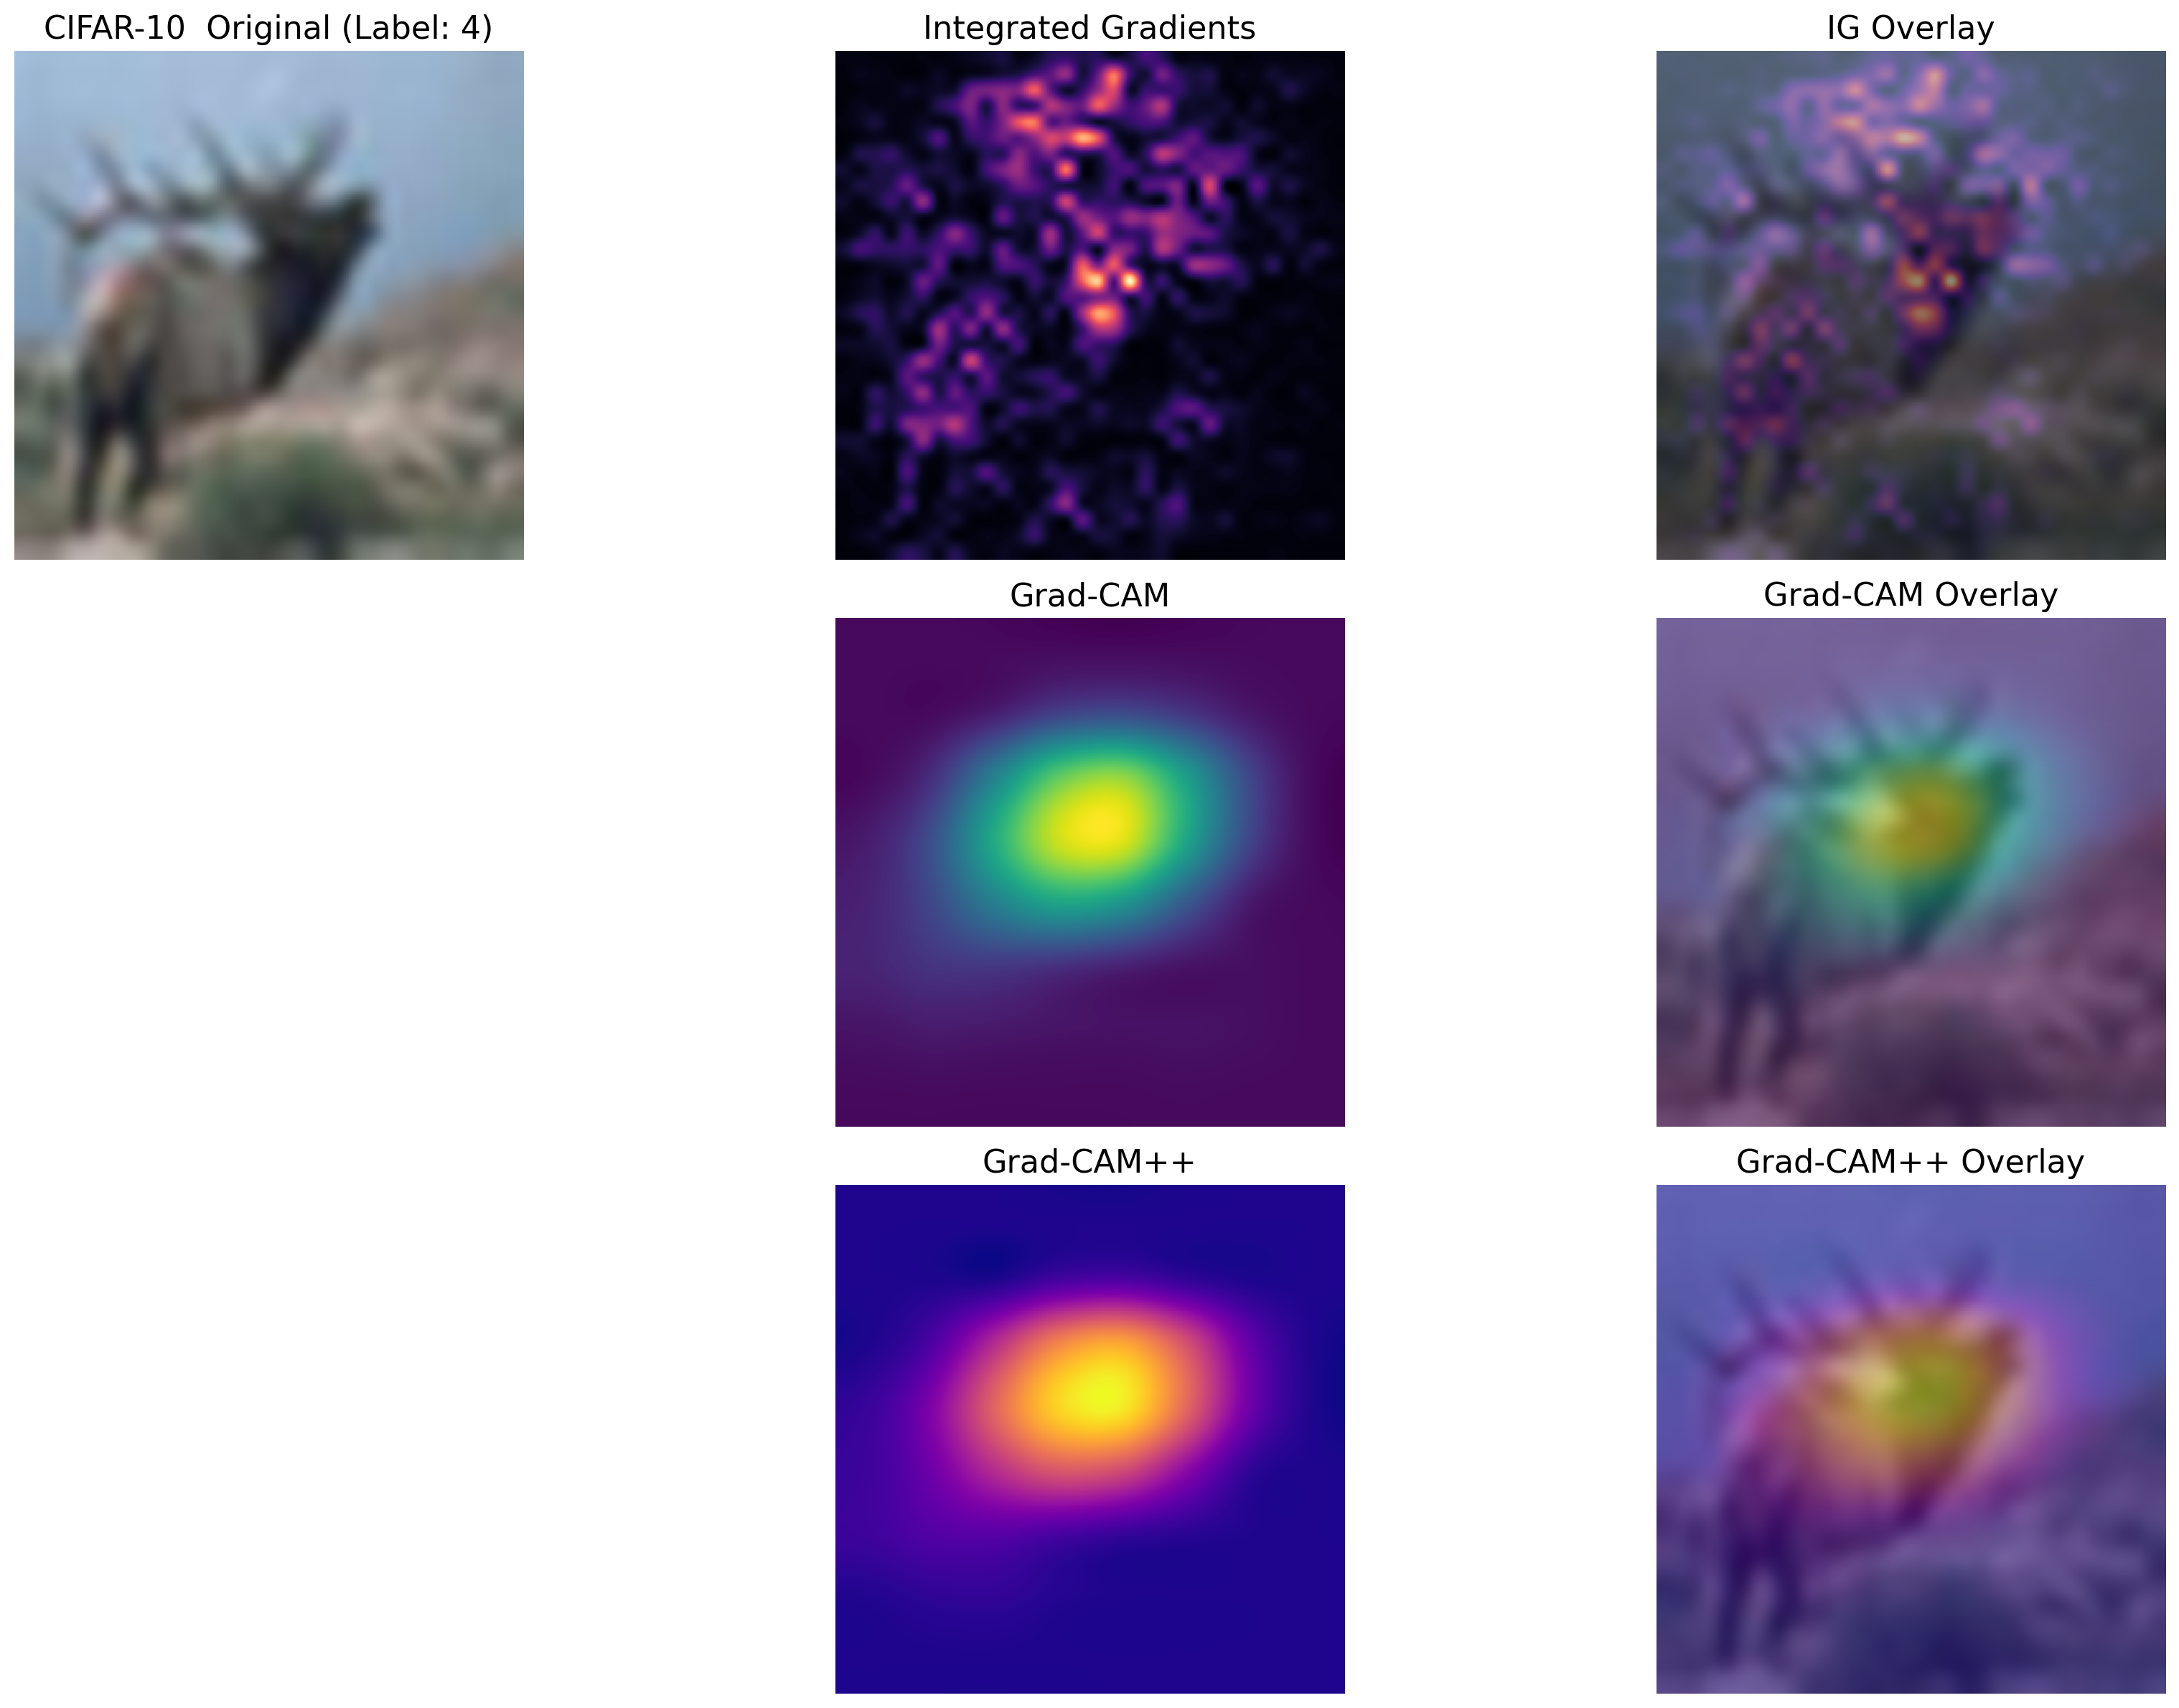

[saturate] True Label:      6
[saturate] Predicted Label: 6


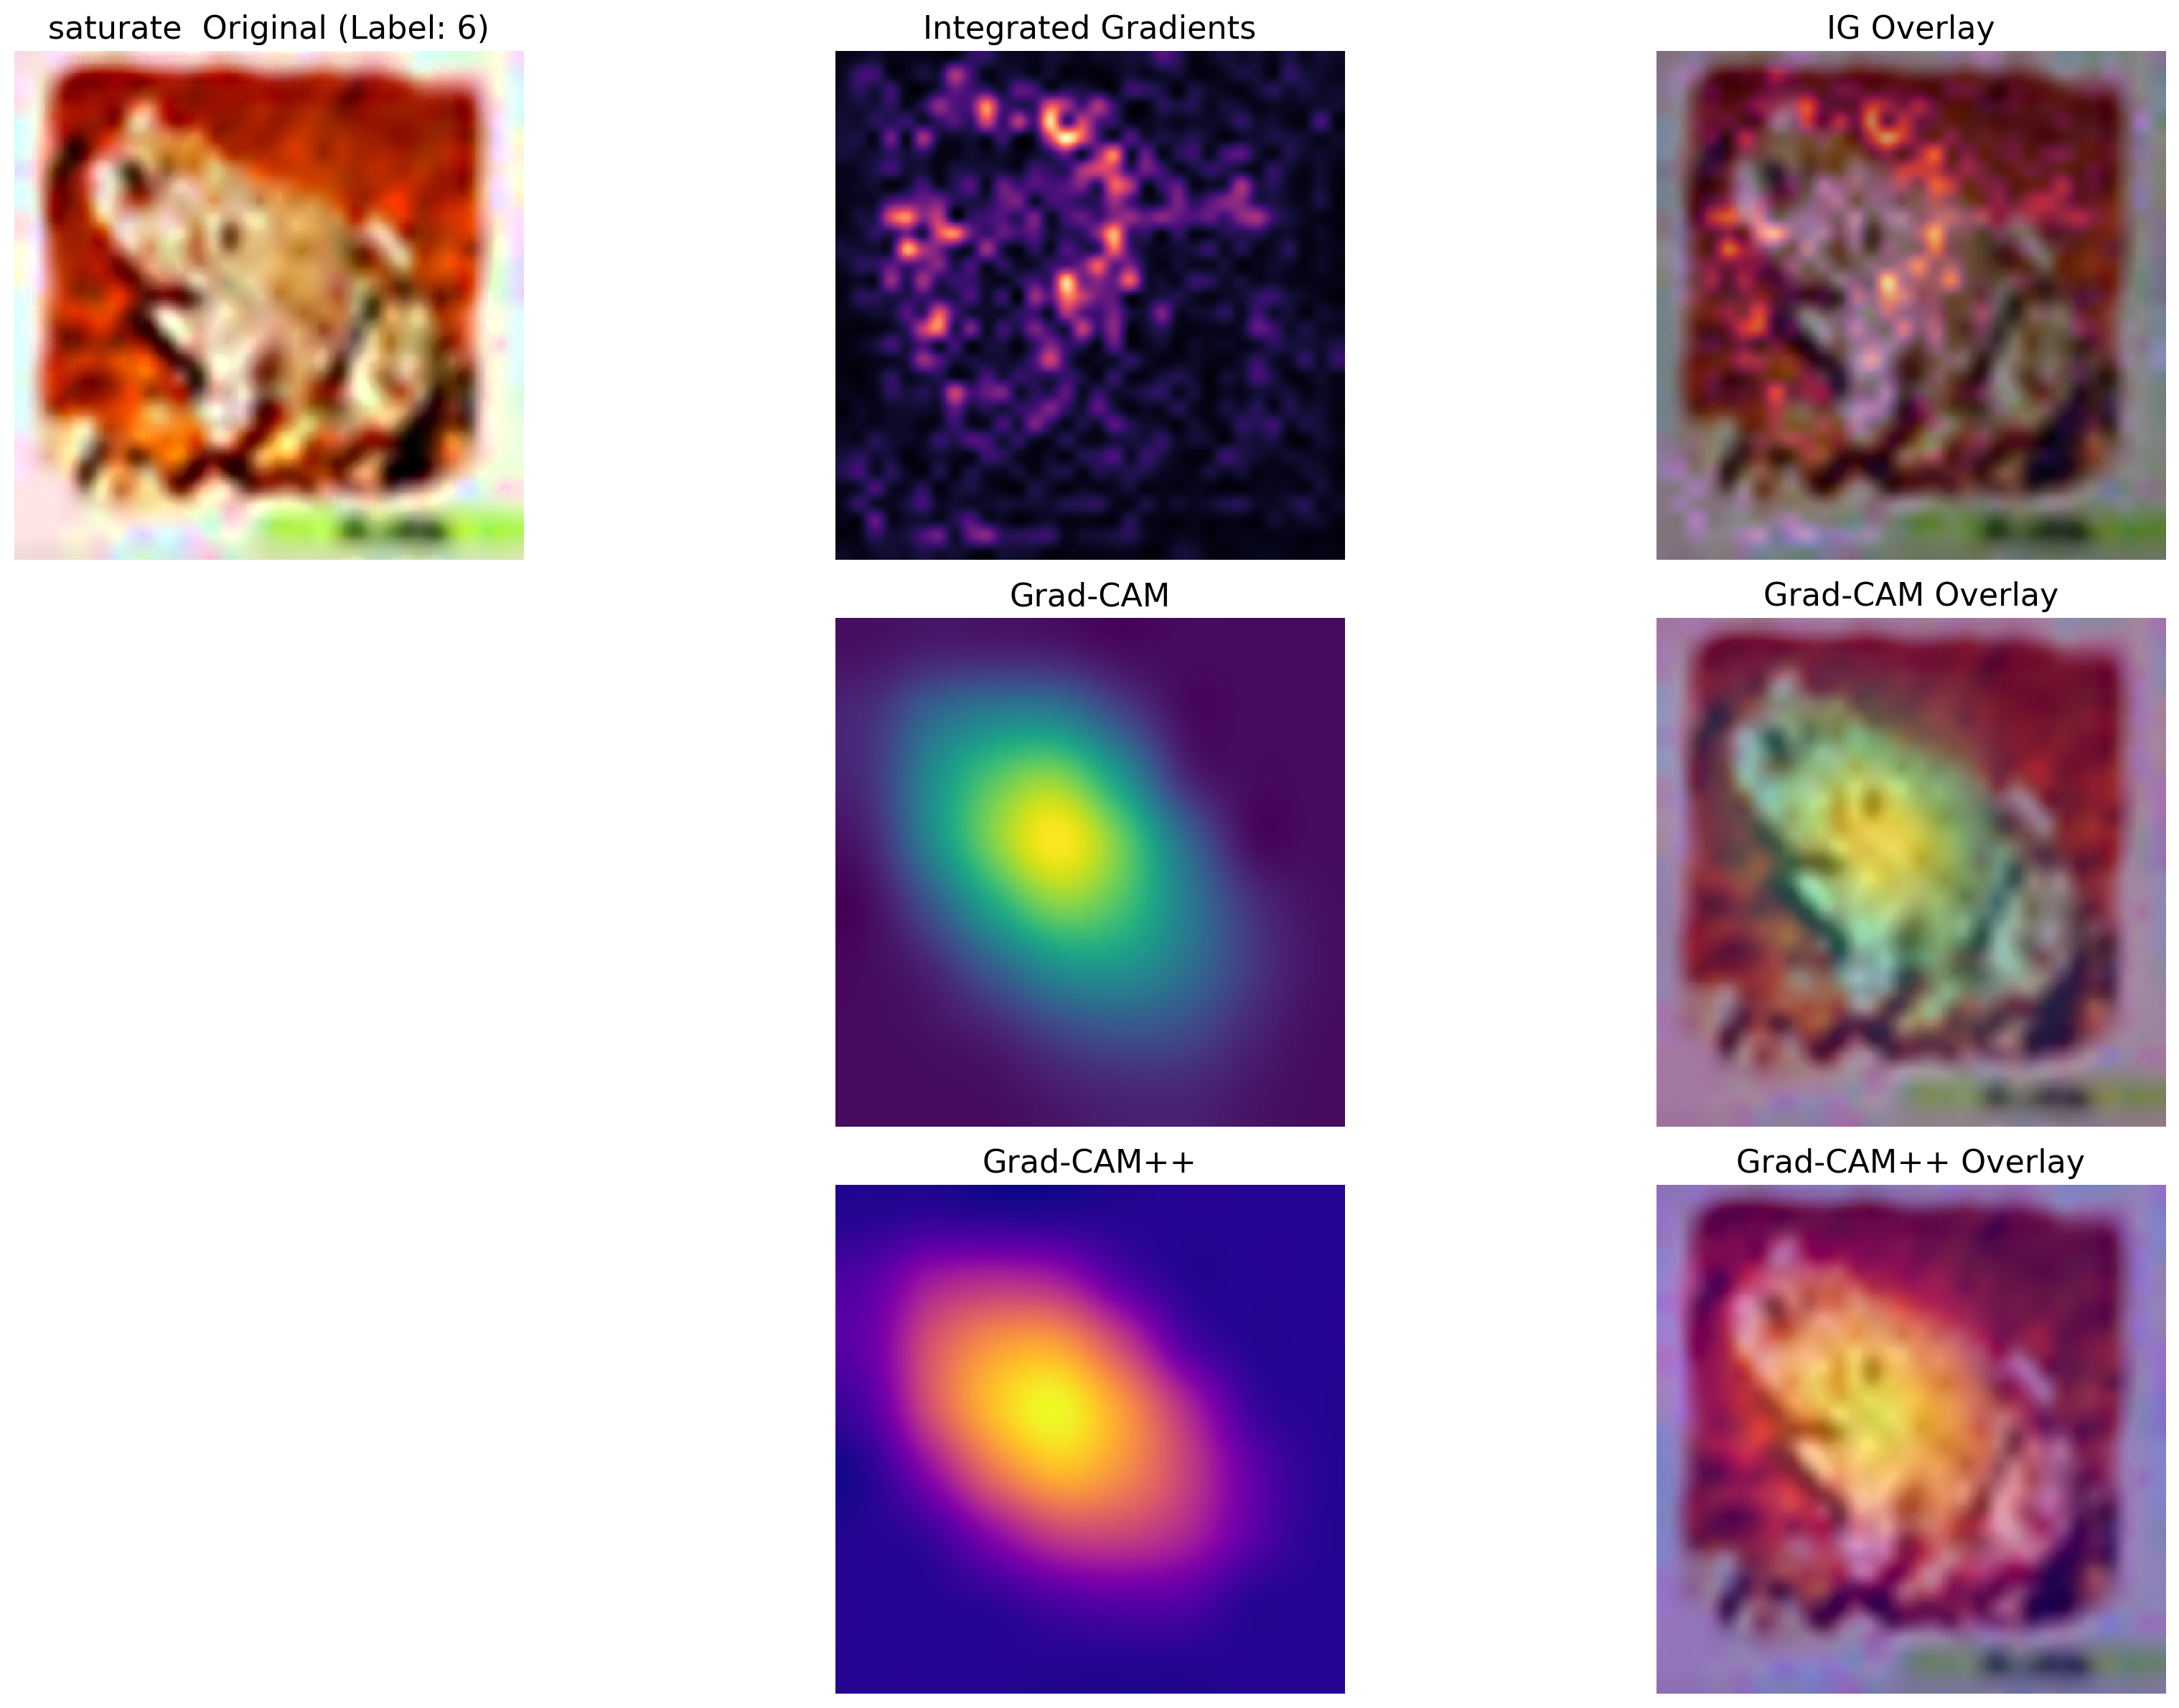

In [8]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import os
from PIL import Image, ImageFilter

from explainers.integratedGradients import integrated_gradients
from explainers.gradcam import GradCAM
from explainers.gradcampp import GradCAMPlusPlus

cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std  = (0.2470, 0.2435, 0.2616)

# --- Denormalization Utility ---
def denormalize(img_tensor, mean=cifar10_mean, std=cifar10_std):
    """Denormalize a (3,H,W) tensor to H×W×3 in [0,1]."""
    img = img_tensor.detach().cpu().numpy()
    for i in range(3):
        img[i] = img[i] * std[i] + mean[i]
    img = np.clip(img, 0, 1)
    return np.transpose(img, (1, 2, 0))  # H×W×3

# --- Upscaling Utilities ---
def upscale_image(img_tensor, size=256):
    """Bicubic + antialiasing upsample via PyTorch."""
    batch = img_tensor.unsqueeze(0)
    up = F.interpolate(batch, size=(size, size),
                       mode='bicubic', align_corners=False,
                       antialias=True)
    up = up.squeeze(0)
    return denormalize(up)

def upscale_map(cam_map, size=256):
    """Bicubic + antialiasing upsample for single‐channel maps."""
    t = torch.tensor(cam_map, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    up = F.interpolate(t, size=(size, size),
                      mode='bicubic', align_corners=False,
                      antialias=True)
    up = up.squeeze().numpy()
    return (up - up.min()) / (up.max() - up.min() + 1e-8)

def upscale_with_lanczos_and_sharpen(img_tensor, size=256):
    """
    PIL resize with LANCZOS + UnsharpMask.
    Produces very crisp RGB images.
    """
    arr = (denormalize(img_tensor) * 255).astype(np.uint8)
    pil_img = Image.fromarray(arr)
    # Lanczos resize:
    pil_img = pil_img.resize((size, size), resample=Image.LANCZOS)
    # Unsharp mask to boost edge contrast:
    pil_img = pil_img.filter(ImageFilter.UnsharpMask(radius=2, percent=200, threshold=3))
    return np.array(pil_img).astype(np.float32) / 255.0

# --- High-Def Combined Plot ---
def plot_hd_ig_gradcam(
    img_tensor, ig_map, gradcam_map, gradcampp_map,
    label=None, title_prefix="", size=256,
    method='lanczos'    # 'bicubic' or 'lanczos'
):
    """
    method='lanczos' → PIL LANCZOS + Unsharp
    method='bicubic'  → PyTorch bicubic + antialias
    """
    if method == 'lanczos':
        img_hd = upscale_with_lanczos_and_sharpen(img_tensor, size=size)
    else:
        img_hd = upscale_image(img_tensor, size=size)

    ig_hd        = upscale_map(ig_map, size=size)
    gradcam_hd   = upscale_map(gradcam_map, size=size)
    gradcampp_hd = upscale_map(gradcampp_map, size=size)

    # HIGH-DPI canvas + no interpolation blur
    plt.figure(figsize=(18, 12), dpi=200)

    # Row 1: Original & IG
    plt.subplot(3, 3, 1)
    plt.imshow(img_hd, interpolation='none')
    lblstr = f" (Label: {label})" if label is not None else ""
    plt.title(f"{title_prefix}Original{lblstr}", fontsize=16)
    plt.axis('off')

    plt.subplot(3, 3, 2)
    plt.imshow(ig_hd, cmap='magma', interpolation='none')
    plt.title("Integrated Gradients", fontsize=16)
    plt.axis('off')

    plt.subplot(3, 3, 3)
    plt.imshow(img_hd, interpolation='none')
    plt.imshow(ig_hd, cmap='magma', alpha=0.5, interpolation='none')
    plt.title("IG Overlay", fontsize=16)
    plt.axis('off')

    # Row 2: Grad-CAM
    plt.subplot(3, 3, 5)
    plt.imshow(gradcam_hd, cmap='viridis', interpolation='none')
    plt.title("Grad-CAM", fontsize=16)
    plt.axis('off')

    plt.subplot(3, 3, 6)
    plt.imshow(img_hd, interpolation='none')
    plt.imshow(gradcam_hd, cmap='viridis', alpha=0.5, interpolation='none')
    plt.title("Grad-CAM Overlay", fontsize=16)
    plt.axis('off')

    # Row 3: Grad-CAM++
    plt.subplot(3, 3, 8)
    plt.imshow(gradcampp_hd, cmap='plasma', interpolation='none')
    plt.title("Grad-CAM++", fontsize=16)
    plt.axis('off')

    plt.subplot(3, 3, 9)
    plt.imshow(img_hd, interpolation='none')
    plt.imshow(gradcampp_hd, cmap='plasma', alpha=0.5, interpolation='none')
    plt.title("Grad-CAM++ Overlay", fontsize=16)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# ----------- Usage Example -----------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(cifar10_mean, cifar10_std)
])

# 1) Random CIFAR-10 image
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
idx = np.random.randint(len(testset))
img, label = testset[idx]
inp = img.unsqueeze(0).to(device)

# 2) Model predictions
with torch.no_grad():
    logits = model(inp)
    pred_label = logits.argmax(dim=1).item()
print(f"True Label: {label} | Predicted: {pred_label}")

# 3) IG map
model.eval()
ig_attr = integrated_gradients(model, inp, target_label_idx=label, m_steps=40)
ig_map = ig_attr[0].abs().sum(dim=0).cpu().numpy()

# 4) Grad-CAM
target_layer = model.layer3[-1].conv2
gc = GradCAM(model, target_layer)
gc_map = gc(inp, target_class=label)

# 5) Grad-CAM++
gradcampp = GradCAMPlusPlus(model, target_layer)
gc_pp_map = gradcampp(inp, target_class=label)

# 6) Plot with LANCZOS+sharpen (try method='bicubic' to compare)
plot_hd_ig_gradcam(
    img, ig_map, gc_map, gc_pp_map,
    label=label,
    title_prefix="CIFAR-10  ",
    size=512,
    method='lanczos'
)

# ----------- 5) CIFAR-10-C example (same pattern) -----------
c10c_dir   = './data/CIFAR-10-C'
corruptions = sorted([f.replace('.npy','')
                      for f in os.listdir(c10c_dir)
                      if f.endswith('.npy') and f!='labels.npy'])
chosen = np.random.choice(corruptions)
imgs = np.load(f"{c10c_dir}/{chosen}.npy")
labels = np.load(f"{c10c_dir}/labels.npy")

i = np.random.randint(len(imgs))
c_img = imgs[i]; c_lbl = int(labels[i])

c_img_tensor = torch.tensor(c_img).permute(2,0,1).float().div(255)
for t, m, s in zip(c_img_tensor, cifar10_mean, cifar10_std):
    t.sub_(m).div_(s)
c_img_tensor = c_img_tensor.unsqueeze(0).to(device)  # shape: [1, 3, 32, 32]

with torch.no_grad():
    logits_c = model(c_img_tensor)
    pred_label_c = logits_c.argmax(dim=1).item()

print(f"[{chosen}] True Label:      {c_lbl}")
print(f"[{chosen}] Predicted Label: {pred_label_c}")


# preprocess
c_t = torch.tensor(c_img).permute(2,0,1).float().div(255)
for ch, m, s in zip(c_t, cifar10_mean, cifar10_std):
    ch.sub_(m).div_(s)
c_t = c_t.unsqueeze(0).to(device)




# IG + Grad-CAM
c_ig  = integrated_gradients(model, c_t, target_label_idx=c_lbl, m_steps=40)
c_map = c_ig[0].abs().sum(dim=0).cpu().numpy()
c_gc  = gc(c_t, target_class=c_lbl)
c_gc_pp = gradcampp(c_t, target_class=c_lbl)

# Plot
plot_hd_ig_gradcam(c_t.squeeze(0), c_map, c_gc, c_gc_pp, c_lbl, title_prefix=f"{chosen}  ")


In [10]:
!python distillation.py \
  --explainer cam \
  --teacher_ckpt /home/adi000001kmr/ECS189G/Checkpoints/resnet56_teacher_best.pth \
  --output /home/adi000001kmr/ECS189G/Checkpoints/student_cam.pth \
  --data_dir ./data \
  --batch_size 256 \
  --epochs 150 \
  --alpha 0.5 \
  --temperature 4.0 \
  --gamma_attr 1.0 \
  --num_workers 4 \
  --m_steps 10 \
  --attr_freq 16 \
  --attr_strategy hybrid \
  --attr_batch_size 64


Attribution strategy: hybrid
Attribution batch size: 64
Epoch 001:   0%|                                        | 0/196 [00:00<?, ?it/s]/home/adi000001kmr/ECS189G/distillation.py:229: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=(scaler is not None)):
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
/home/adi000001kmr/ECS189G/distillation.py:309: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=(scaler is not None)):
Epoch 001 | Acc: 35.47% | 

In [ ]:
!python distillation.py \
  --explainer cam \
  --teacher_ckpt /home/adi000001kmr/ECS189G/Checkpoints/resnet56_teacher_best.pth \
  --output /home/adi000001kmr/ECS189G/Checkpoints/student_cam_opt_b.pth \
  --data_dir ./data \
  --batch_size 256 \
  --epochs 150 \
  --alpha 0.6 \
  --temperature 5.0 \
  --gamma_attr 0.02 \
  --lr 0.1 \
  --milestones 60 120 \
  --gamma_lr 0.1 \
  --num_workers 4 \
  --attr_freq 25 \
  --attr_strategy hybrid \
  --attr_batch_size 64

In [ ]:
!python distillation.py \
  --explainer cam \
  --teacher_ckpt /home/adi000001kmr/ECS189G/Checkpoints/resnet56_teacher_best.pth \
  --output /home/adi000001kmr/ECS189G/Checkpoints/student_cam_opt_c.pth \
  --data_dir ./data \
  --batch_size 128 \
  --epochs 200 \
  --alpha 0.8 \
  --temperature 3.0 \
  --gamma_attr 0.01 \
  --lr 0.05 \
  --milestones 80 140 \
  --gamma_lr 0.2 \
  --num_workers 4 \
  --attr_freq 15 \
  --attr_strategy fixed \
  --attr_batch_size 32 \
  --mixed_precision  # Add this for faster training

In [34]:
!python distillation_ig.py \
  --teacher_ckpt /home/adi000001kmr/ECS189G/Checkpoints/resnet56_teacher_best.pth \
  --output       /home/adi000001kmr/ECS189G/Checkpoints/student_ig.pth \
  --data_dir     ./data \
  --batch_size   1 \
  --num_workers  2 \
  --epochs       30 \
  --lr           0.1 \
  --weight_decay 1e-4 \
  --milestones   15 25 \
  --gamma_lr     0.1 \
  --alpha        0.5 \
  --temperature  4.0 \
  --gamma_attr   1.0 \
  --m_steps      20 \
  --mixed_precision \
  --compile_model


/home/adi000001kmr/ECS189G/distillation_ig.py:73: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if (args.mixed_precision and device.type == 'cuda') else None
Starting IG-based distillation
  Batch size      : 1
  Epochs          : 30
  LR              : 0.1
  m_steps (IG)    : 20
  α (CE weight)   : 0.5
  T (temperature) : 4.0
  γ (attr weight) : 1.0
  Mixed Precision : True
  Compile Model   : True
Epoch 01:   0%|                                       | 0/50000 [00:00<?, ?it/s]/home/adi000001kmr/ECS189G/distillation_ig.py:146: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=(scaler is not None)):
W0601 00:28:40.075000 1284883 site-packages/torch/_inductor/utils.py:1250] [0/0] Not enough SMs to use max_autotune_gemm mode
^C
Traceback (most recent call last):                            

In [36]:
!python distillation.py \
  --explainer campp \
  --teacher_ckpt /home/adi000001kmr/ECS189G/Checkpoints/resnet56_teacher_best.pth \
  --output /home/adi000001kmr/ECS189G/Checkpoints/student_campp.pth \
  --data_dir ./data \
  --batch_size 256 \
  --epochs 75 \
  --alpha 0.5 \
  --temperature 4.0 \
  --gamma_attr 1.0 \
  --num_workers 4 \
  --m_steps 10 \
  --attr_freq 16 \
  --attr_strategy hybrid \
  --attr_batch_size 48

Attribution strategy: hybrid
Attribution batch size: 48
Epoch 001:   0%|                                        | 0/196 [00:00<?, ?it/s]/home/adi000001kmr/ECS189G/distillation.py:229: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=(scaler is not None)):
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
/home/adi000001kmr/ECS189G/distillation.py:309: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=(scaler is not None)):
Epoch 001 | Acc: 38.19% | 

In [42]:
import torch
from evaluation import evaluate_student, evaluate_cifar10, compute_alignment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

teacher_path = 'Checkpoints/resnet56_teacher_best.pth'

# Update epoch number to match your saved models
student_paths = {
    'cam': 'Checkpoints/student_cam.pth', 
    'campp': 'Checkpoints/student_campp.pth'
}

Using device: cuda


In [41]:
from ig_eval import evaluate_student

# Test your IG student
ig_results = evaluate_student(
    student_path=student_paths['ig'],
    teacher_path=teacher_path,
    explainer_name='ig',
    device=device
)

print(f"Clean Accuracy: {ig_results['clean_accuracy']:.2f}%")
print(f"Alignment Score: {ig_results['alignment_score']:.4f}")

Evaluating IG student...


IG Alignment:  10%|█         | 63/625 [00:27<04:01,  2.33it/s]

Clean Accuracy: 36.15%
Alignment Score: 0.9730



Training History:


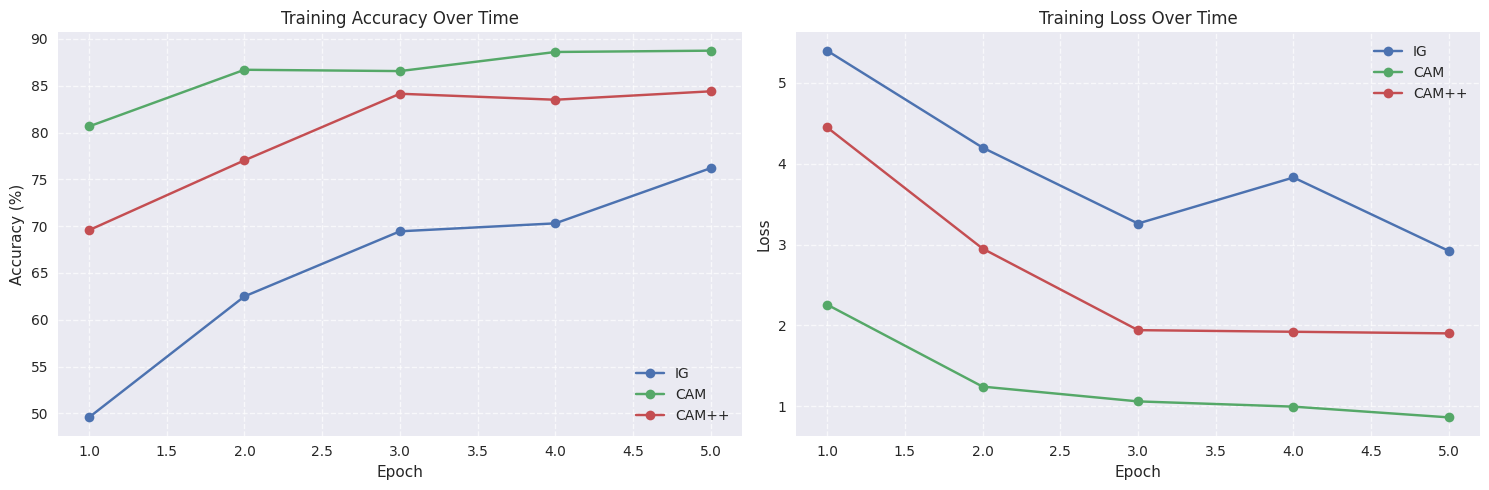

In [59]:
print("\nTraining History:")
fig2 = plot_training_history(history)
plt.show()


In [43]:
results = {}
for explainer_name, student_path in student_paths.items():
    print(f"Evaluating {explainer_name.upper()}...")
    results[explainer_name] = evaluate_student(
        student_path=student_path,
        teacher_path=teacher_path,
        explainer_name=explainer_name,
        device=device
    )

Evaluating CAM...
Evaluating CAM student...


CAM Alignment:  10%|█         | 32/313 [00:10<01:34,  2.98it/s]


Evaluating CAMPP...
Evaluating CAMPP student...


CAMPP Alignment:  10%|█         | 32/313 [00:10<01:35,  2.96it/s]


In [45]:
print("FINAL COMPARISON")
print("="*60)
for explainer, metrics in results.items():
    print(f"{explainer.upper():<8} {metrics['clean_accuracy']:<12.2f} {metrics['alignment_score']:<12.4f}")

FINAL COMPARISON
CAM      88.92        1.0000      
CAMPP    84.41        1.0000      


In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_performance_metrics(results_dict):
    """
    Create bar plots for model performance metrics.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Prepare data
    models = list(results_dict.keys())
    clean_accuracies = [results_dict[m]['clean_accuracy'] for m in models]
    alignment_scores = [results_dict[m]['alignment_score'] for m in models]
    
    # Plot clean accuracy
    ax1.bar(models, clean_accuracies, color='skyblue')
    ax1.set_title('Clean Accuracy by Model')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_ylim(0, 100)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot alignment score
    ax2.bar(models, alignment_scores, color='lightgreen')
    ax2.set_title('Alignment Score by Model')
    ax2.set_ylabel('Alignment Score')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    return fig

def plot_training_history(history_dict):
    """
    Create line plots for training metrics over time.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracy over time
    for model_name, history in history_dict.items():
        epochs = range(1, len(history['accuracy']) + 1)
        ax1.plot(epochs, history['accuracy'], label=model_name, marker='o')
    
    ax1.set_title('Training Accuracy Over Time')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy (%)')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()
    
    # Plot loss over time
    for model_name, history in history_dict.items():
        epochs = range(1, len(history['loss']) + 1)
        ax2.plot(epochs, history['loss'], label=model_name, marker='o')
    
    ax2.set_title('Training Loss Over Time')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()
    
    plt.tight_layout()
    return fig

def plot_model_comparison(results_dict):
    """
    Create a radar plot comparing all metrics across models.
    """
    # Prepare data
    models = list(results_dict.keys())
    metrics = ['clean_accuracy', 'alignment_score', 'mse']
    metric_names = ['Clean Accuracy', 'Alignment Score', 'MSE']
    
    # Normalize data for radar plot
    data = np.array([[results_dict[m][metric] for metric in metrics] for m in models])
    data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
    
    # Create radar plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)
    
    # Plot each model
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # close the loop
    
    for i, model in enumerate(models):
        values = np.concatenate((data_norm[i], [data_norm[i][0]]))  # close the loop
        ax.plot(angles, values, label=model, marker='o')
        ax.fill(angles, values, alpha=0.1)
    
    # Set labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metric_names)
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.title('Model Comparison Radar Plot')
    return fig


Model Performance Metrics:


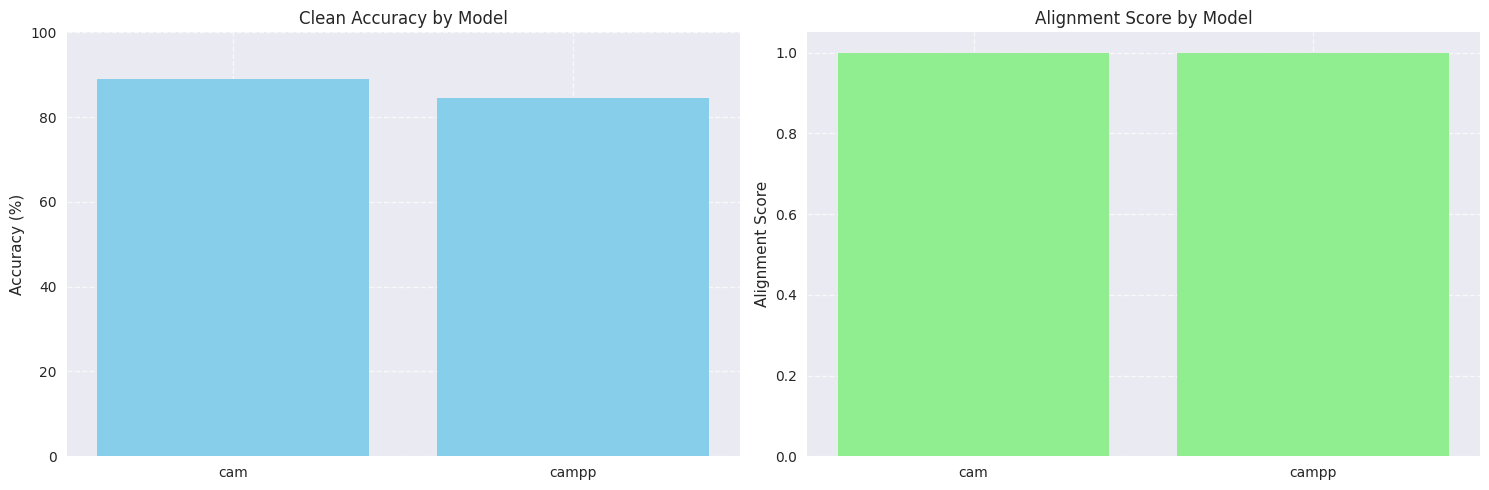

In [58]:
print("\nModel Performance Metrics:")
fig1 = plot_performance_metrics(results)
plt.show()

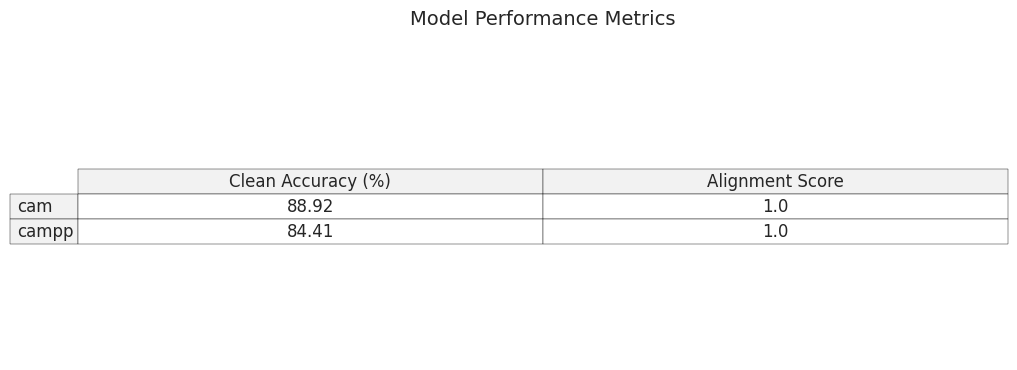

In [50]:
from table_utils import (
    create_performance_table,
    create_training_summary_table,
    create_complete_summary_table
)

fig1 = create_performance_table(results)
plt.show()



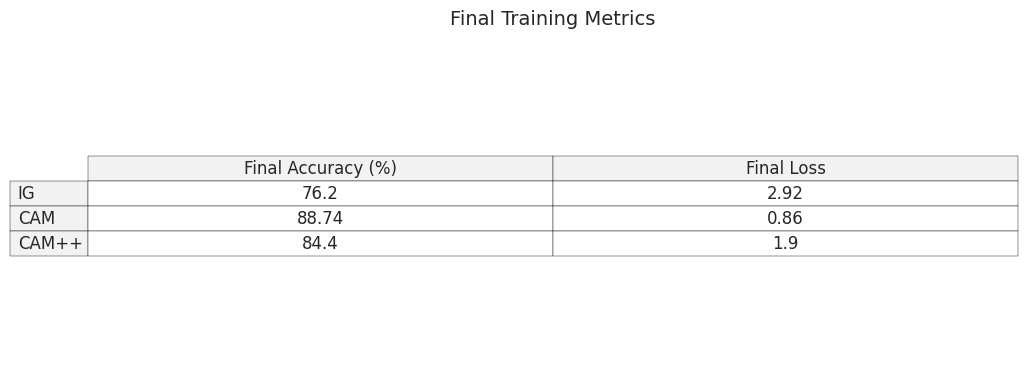

In [54]:
history = {
    'IG': {
        'accuracy': [49.58, 62.5, 69.45, 70.3, 76.2],
        'loss': [5.4, 4.2, 3.26, 3.83, 2.92]
    },
    'CAM': {
        'accuracy': [80.65, 86.7, 86.56, 88.6, 88.74],
        'loss': [2.256, 1.241, 1.058, 0.993, 0.86]
    },
    'CAM++': {
        'accuracy': [69.57, 77.03, 84.14, 83.5, 84.4],
        'loss': [4.45, 2.95, 1.94, 01.92, 1.90]
    }
}


fig2 = create_training_summary_table(history)
plt.show()


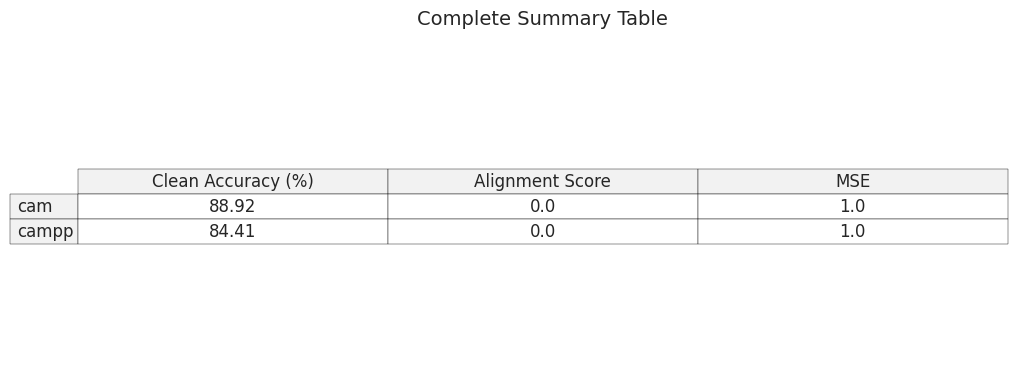

In [55]:
fig3 = create_complete_summary_table(results)
plt.show()

Loading ResNet-56 teacher and CAM student models...
Models loaded successfully!
Generating Grad-CAM explanations for image with true label: 3


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1842: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


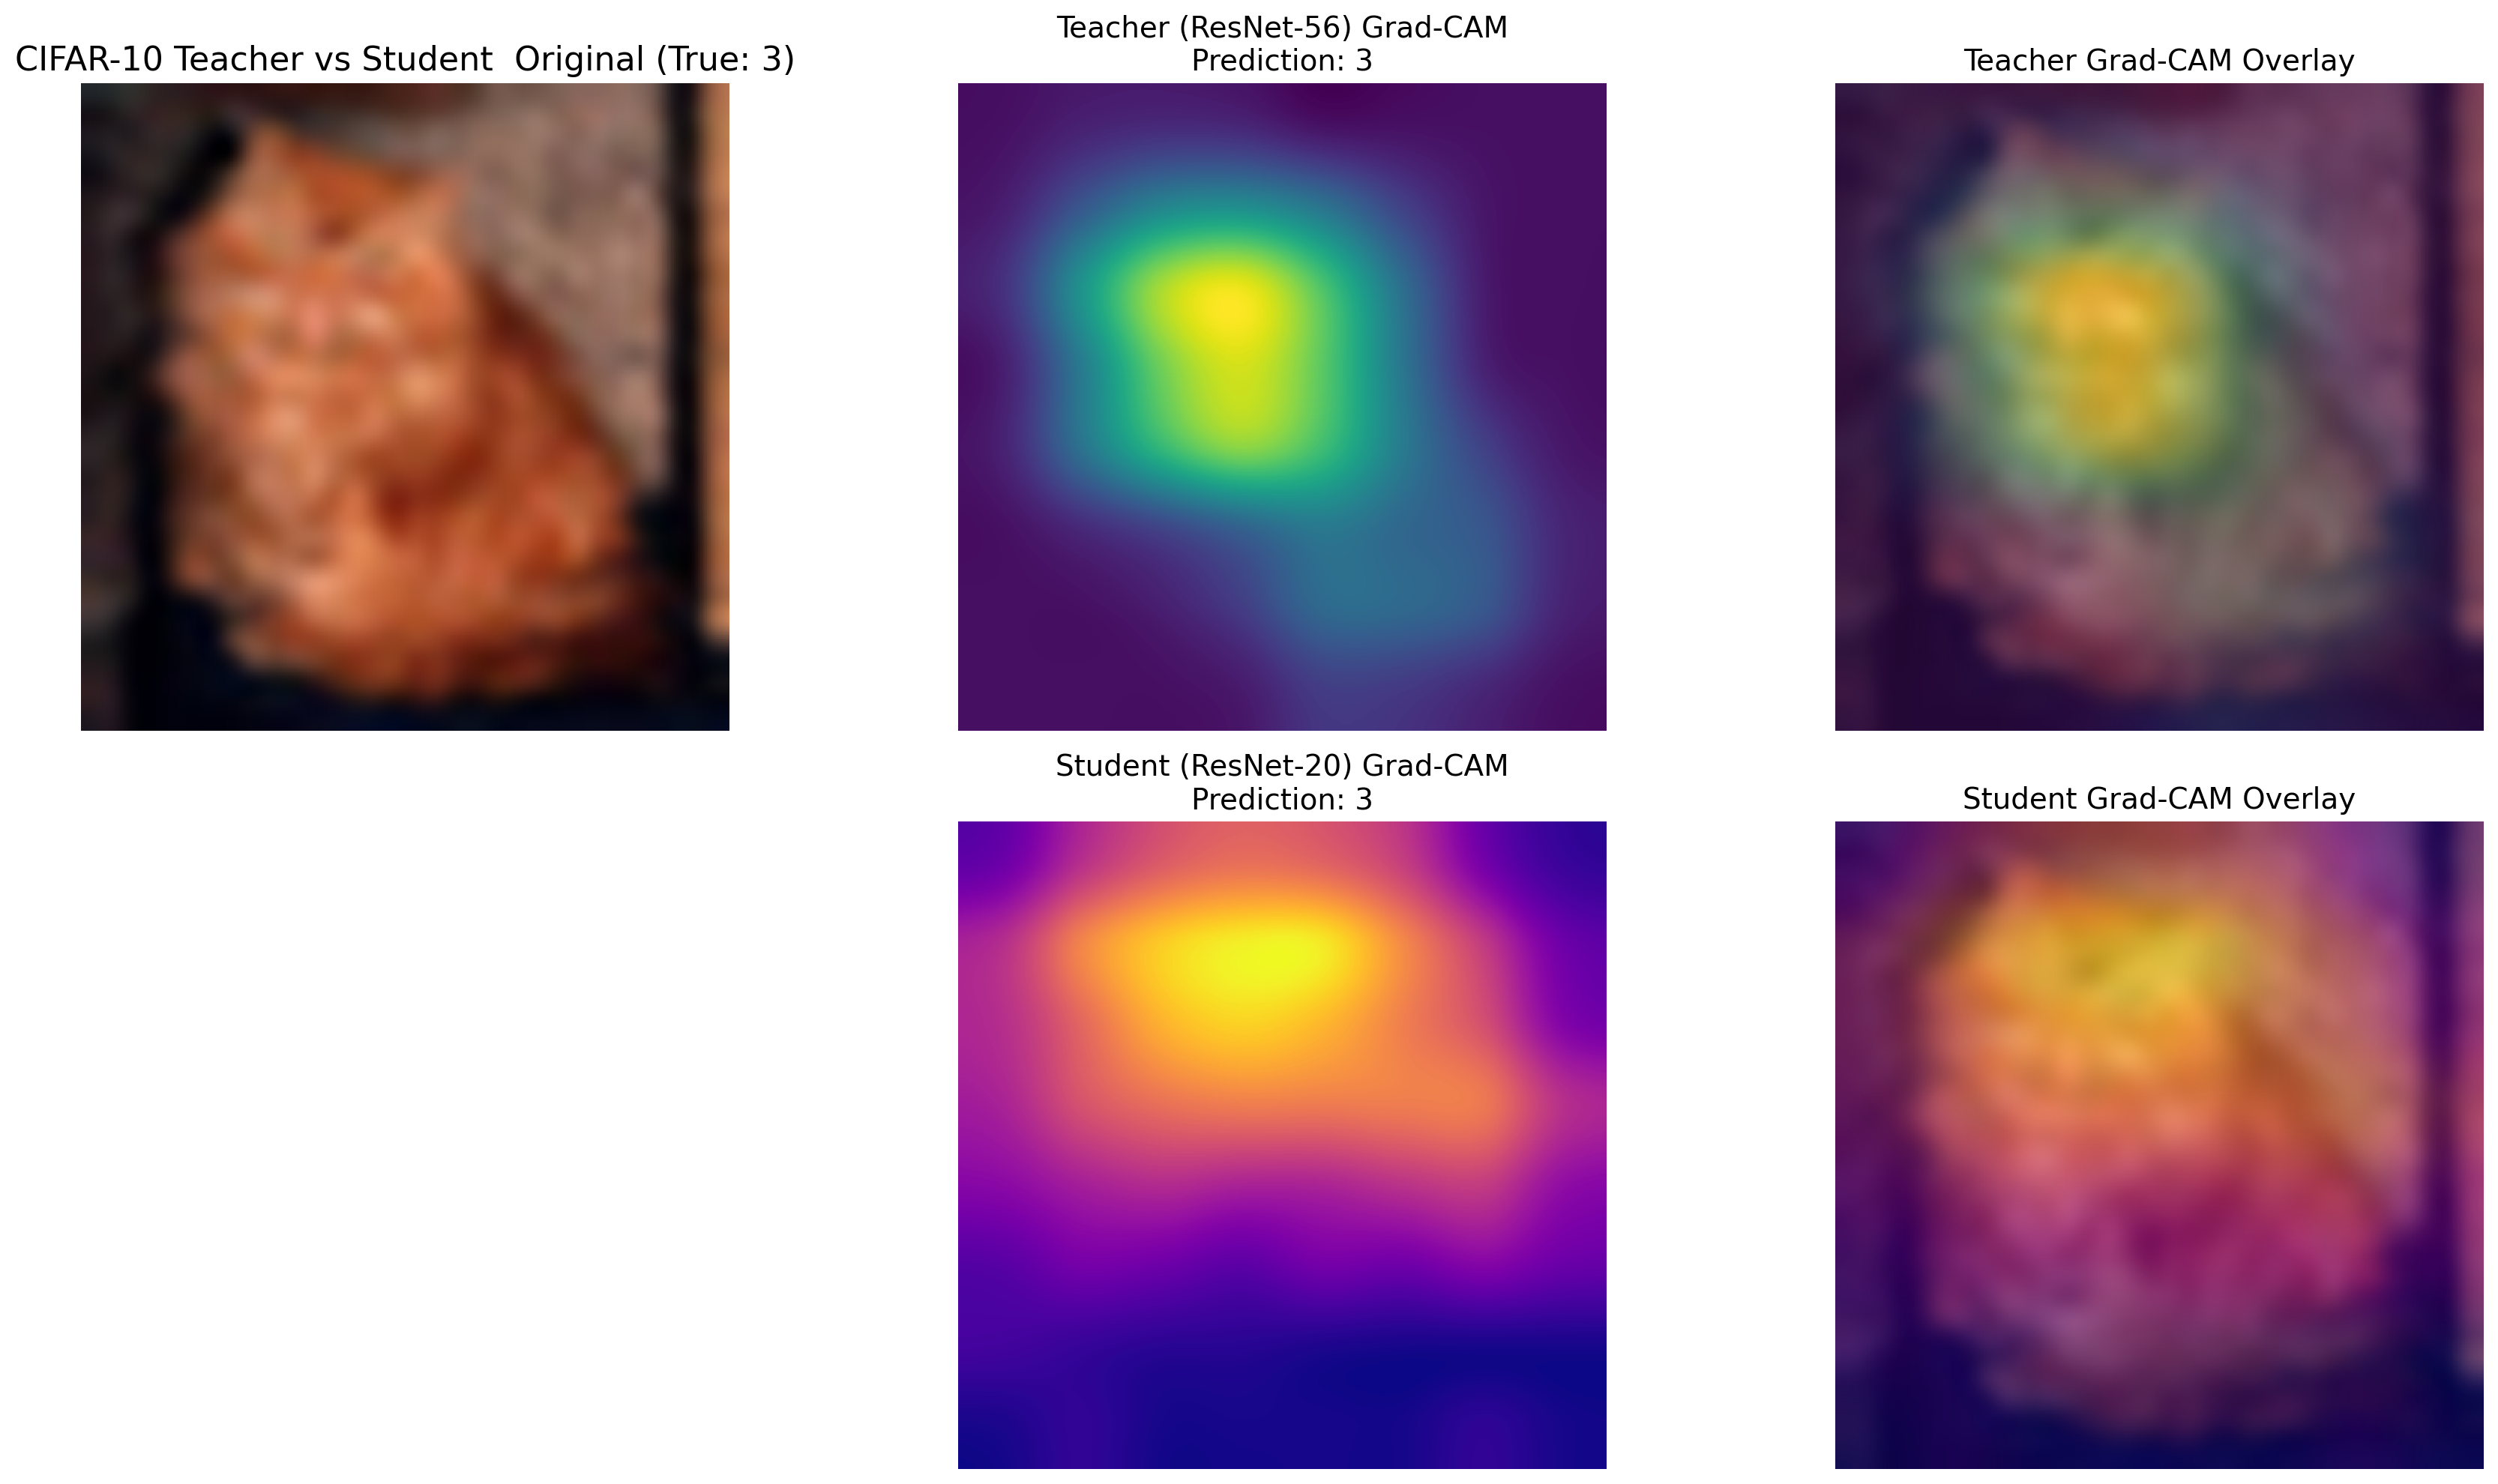


Teacher (ResNet-56) prediction: 3
Student (ResNet-20 CAM) prediction: 3
✅ Both models predict correctly!

Testing on CIFAR-10-C (corrupted images)
CIFAR-10-C dataset not found. Skipping corrupted image test.


In [9]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import os
from PIL import Image, ImageFilter

from explainers.gradcam import GradCAM
from model_utils import resnet56, resnet20

cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std  = (0.2470, 0.2435, 0.2616)

# --- Load Models ---
def load_teacher_and_student(device):
    """Load ResNet-56 teacher and CAM student models"""
    # Teacher model (ResNet-56)
    teacher = resnet56(num_classes=10).to(device)
    teacher.load_state_dict(torch.load('/home/adi000001kmr/ECS189G/Checkpoints/resnet56_teacher_best.pth', map_location=device))
    teacher.eval()
    
    # Student model trained with CAM
    student = resnet20(num_classes=10).to(device)
    student.load_state_dict(torch.load('/home/adi000001kmr/ECS189G/Checkpoints/student_cam.pth', map_location=device))
    student.eval()
    
    return teacher, student

# --- Denormalization Utility ---
def denormalize(img_tensor, mean=cifar10_mean, std=cifar10_std):
    """Denormalize a (3,H,W) tensor to H×W×3 in [0,1]."""
    img = img_tensor.detach().cpu().numpy()
    for i in range(3):
        img[i] = img[i] * std[i] + mean[i]
    img = np.clip(img, 0, 1)
    return np.transpose(img, (1, 2, 0))  # H×W×3

# --- Upscaling Utilities ---
def upscale_image(img_tensor, size=256):
    """Bicubic + antialiasing upsample via PyTorch."""
    batch = img_tensor.unsqueeze(0)
    up = F.interpolate(batch, size=(size, size),
                       mode='bicubic', align_corners=False,
                       antialias=True)
    up = up.squeeze(0)
    return denormalize(up)

def upscale_map(cam_map, size=256):
    """Bicubic + antialiasing upsample for single‐channel maps."""
    t = torch.tensor(cam_map, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    up = F.interpolate(t, size=(size, size),
                      mode='bicubic', align_corners=False,
                      antialias=True)
    up = up.squeeze().numpy()
    return (up - up.min()) / (up.max() - up.min() + 1e-8)

def upscale_with_lanczos_and_sharpen(img_tensor, size=256):
    """
    PIL resize with LANCZOS + UnsharpMask.
    Produces very crisp RGB images.
    """
    arr = (denormalize(img_tensor) * 255).astype(np.uint8)
    pil_img = Image.fromarray(arr)
    # Lanczos resize:
    pil_img = pil_img.resize((size, size), resample=Image.LANCZOS)
    # Unsharp mask to boost edge contrast:
    pil_img = pil_img.filter(ImageFilter.UnsharpMask(radius=2, percent=200, threshold=3))
    return np.array(pil_img).astype(np.float32) / 255.0

# --- Teacher vs Student Grad-CAM Comparison ---
def plot_teacher_student_gradcam(
    img_tensor, teacher, student, 
    label=None, title_prefix="", size=512,
    method='lanczos'
):
    """
    Generate Grad-CAM explanations from both teacher and student models and compare them.
    """
    device = next(teacher.parameters()).device
    inp = img_tensor.unsqueeze(0).to(device)
    
    if method == 'lanczos':
        img_hd = upscale_with_lanczos_and_sharpen(img_tensor, size=size)
    else:
        img_hd = upscale_image(img_tensor, size=size)

    # Get predictions from both models
    with torch.no_grad():
        teacher_logits = teacher(inp)
        teacher_pred = teacher_logits.argmax(dim=1).item()
        
        student_logits = student(inp)
        student_pred = student_logits.argmax(dim=1).item()
    
    # Generate Grad-CAM for teacher (ResNet-56)
    teacher_target_layer = teacher.layer3[-1].conv2  # Last conv layer of ResNet-56
    teacher_gradcam = GradCAM(teacher, teacher_target_layer)
    teacher_cam = teacher_gradcam(inp, target_class=label)
    teacher_cam_hd = upscale_map(teacher_cam, size=size)
    
    # Generate Grad-CAM for student (ResNet-20)
    student_target_layer = student.layer3[-1].conv2  # Last conv layer of ResNet-20
    student_gradcam = GradCAM(student, student_target_layer)
    student_cam = student_gradcam(inp, target_class=label)
    student_cam_hd = upscale_map(student_cam, size=size)

    # Create comparison plot
    plt.figure(figsize=(18, 10), dpi=200)
    
    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(img_hd, interpolation='none')
    lblstr = f" (True: {label})" if label is not None else ""
    plt.title(f"{title_prefix}Original{lblstr}", fontsize=16)
    plt.axis('off')
    
    # Teacher Grad-CAM
    plt.subplot(2, 3, 2)
    plt.imshow(teacher_cam_hd, cmap='viridis', interpolation='none')
    plt.title(f"Teacher (ResNet-56) Grad-CAM\nPrediction: {teacher_pred}", fontsize=14)
    plt.axis('off')
    
    # Teacher Grad-CAM Overlay
    plt.subplot(2, 3, 3)
    plt.imshow(img_hd, interpolation='none')
    plt.imshow(teacher_cam_hd, cmap='viridis', alpha=0.5, interpolation='none')
    plt.title("Teacher Grad-CAM Overlay", fontsize=14)
    plt.axis('off')
    
    # Student Grad-CAM
    plt.subplot(2, 3, 5)
    plt.imshow(student_cam_hd, cmap='plasma', interpolation='none')
    plt.title(f"Student (ResNet-20) Grad-CAM\nPrediction: {student_pred}", fontsize=14)
    plt.axis('off')
    
    # Student Grad-CAM Overlay
    plt.subplot(2, 3, 6)
    plt.imshow(img_hd, interpolation='none')
    plt.imshow(student_cam_hd, cmap='plasma', alpha=0.5, interpolation='none')
    plt.title("Student Grad-CAM Overlay", fontsize=14)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'teacher_prediction': teacher_pred,
        'student_prediction': student_pred,
        'teacher_cam': teacher_cam,
        'student_cam': student_cam
    }

# ----------- Usage Example -----------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(cifar10_mean, cifar10_std)
])

# Load teacher and student models
print("Loading ResNet-56 teacher and CAM student models...")
teacher, student = load_teacher_and_student(device)
print("Models loaded successfully!")

# 1) Random CIFAR-10 image
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
idx = np.random.randint(len(testset))
img, label = testset[idx]

# 2) Generate and compare Grad-CAM explanations
print(f"Generating Grad-CAM explanations for image with true label: {label}")
results = plot_teacher_student_gradcam(
    img, teacher, student,
    label=label,
    title_prefix="CIFAR-10 Teacher vs Student  ",
    size=512,
    method='lanczos'
)

# Print predictions from both models
print(f"\nTeacher (ResNet-56) prediction: {results['teacher_prediction']}")
print(f"Student (ResNet-20 CAM) prediction: {results['student_prediction']}")

# Check if predictions match
if results['teacher_prediction'] == results['student_prediction'] == label:
    print("✅ Both models predict correctly!")
elif results['teacher_prediction'] == results['student_prediction']:
    print("⚠️ Both models agree but predict incorrectly")
elif results['teacher_prediction'] == label:
    print("⚠️ Teacher correct, student incorrect")
elif results['student_prediction'] == label:
    print("⚠️ Student correct, teacher incorrect")
else:
    print("❌ Both models predict incorrectly and disagree")

# ----------- CIFAR-10-C example -----------
print("\n" + "="*50)
print("Testing on CIFAR-10-C (corrupted images)")

c10c_dir = './data/CIFAR-10-C'
if os.path.exists(c10c_dir):
    corruptions = sorted([f.replace('.npy','')
                          for f in os.listdir(c10c_dir)
                          if f.endswith('.npy') and f!='labels.npy'])
    chosen = np.random.choice(corruptions)
    imgs = np.load(f"{c10c_dir}/{chosen}.npy")
    labels = np.load(f"{c10c_dir}/labels.npy")

    i = np.random.randint(len(imgs))
    c_img = imgs[i]; c_lbl = int(labels[i])

    # Preprocess corrupted image
    c_img_tensor = torch.tensor(c_img).permute(2,0,1).float().div(255)
    for t, m, s in zip(c_img_tensor, cifar10_mean, cifar10_std):
        t.sub_(m).div_(s)

    print(f"Generating Grad-CAM explanations for {chosen} corrupted image with true label: {c_lbl}")
    results_c = plot_teacher_student_gradcam(
        c_img_tensor, teacher, student,
        label=c_lbl,
        title_prefix=f"{chosen} Teacher vs Student  ",
        size=512,
        method='lanczos'
    )

    # Print predictions from both models on corrupted image
    print(f"\nOn {chosen} corruption:")
    print(f"Teacher (ResNet-56) prediction: {results_c['teacher_prediction']}")
    print(f"Student (ResNet-20 CAM) prediction: {results_c['student_prediction']}")
else:
    print("CIFAR-10-C dataset not found. Skipping corrupted image test.")